In [43]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [177]:
df=pd.read_csv('data/data_BNB-USD.csv')
close=df.Close
ret=np.log(close)-np.log(close.shift(1))
ret=ret.dropna()
ret_pos=ret[ret>0]
ret_neg=ret[ret<0]

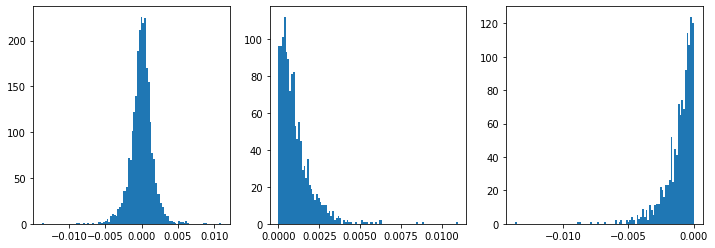

In [178]:
fig, ax = plt.subplots(1,3,figsize=(12,4))
ax[0].hist(ret,bins=100)
ax[1].hist(ret_pos,bins=100)
ax[2].hist(ret_neg,bins=100)
plt.show()

In [179]:
# Calibration of body + tail of distribution
# Here we calibrate via maximum likelihood 
# an exponential distribution for the body 
# and a power law distribution for the tail of the returns' empirical distribution

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:5680: RuntimeWarning: divide by zero encountered in power
  return a*x**(a-1.0)


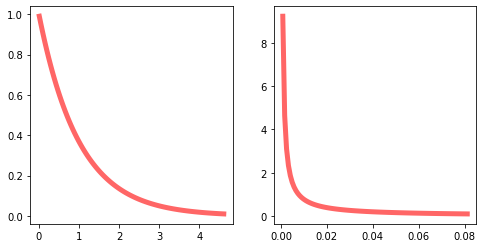

In [265]:
fig, ax = plt.subplots(1,2,figsize=(8,4))

x = np.linspace(stats.expon.ppf(0.01),
                stats.expon.ppf(0.99), 100)

ax[0].plot(x, stats.expon.pdf(x),
       'r-', lw=5, alpha=0.6, label='expon pdf')

x = np.linspace(stats.powerlaw.ppf(0.01,0.008),
                stats.powerlaw.ppf(0.99,0.008–), 100)
ax[1].plot(x, stats.powerlaw.pdf(x,0.008),
       'r-', lw=5, alpha=0.6, label='powerlaw pdf')

In [96]:
stats.expon.fit(ret_pos[ret_pos<0.001], floc=0)

(0.0, 0.00047415283369229026)

In [201]:
log_likelihood = lambda scale,loc: sum([np.log(stats.expon.pdf(v, scale=scale,loc=loc)) for v in ret_pos])

scale = np.arange(0.0008, 0.0012, 0.00001)
loc = np.arange(-0.003, -0.001, 0.0001)

estimates = [[s,l,log_likelihood(s,l)] for s,l in zip(scale,loc)]
estimates = [[s,l log_likelihood(s,l) for s in scale] for l in loc]

print(estimates)
#plt.xlabel('parameter')
#plt.ylabel('log-likelihood')
#plt.plot(scale, estimates)
#print('parameter value: ', scale[estimates.index(max(estimates))])

[[0.0008, -0.003, 2778.551995545879], [0.0008100000000000001, -0.0029000000000000002, 3011.2018324732653], [0.0008200000000000001, -0.0028000000000000004, 3237.9753809861254], [0.0008300000000000001, -0.0027000000000000006, 3459.0874697286135], [0.0008400000000000001, -0.0026000000000000007, 3674.742639484265], [0.0008500000000000002, -0.002500000000000001, 3885.1357503889553], [0.0008600000000000002, -0.002400000000000001, 4090.452546684909], [0.0008700000000000002, -0.0023000000000000013, 4290.870182437763], [0.0008800000000000002, -0.0022000000000000014, 4486.557711326598], [0.0008900000000000003, -0.0021000000000000016, 4677.67654333762], [0.0009000000000000003, -0.0020000000000000018, 4864.38087093972], [0.0009100000000000003, -0.001900000000000002, 5046.818067093429], [0.0009200000000000004, -0.0018000000000000021, 5225.129057240129], [0.0009300000000000004, -0.0017000000000000023, 5399.4486672332], [0.0009400000000000004, -0.0016000000000000025, 5569.90594900609], [0.00095000000

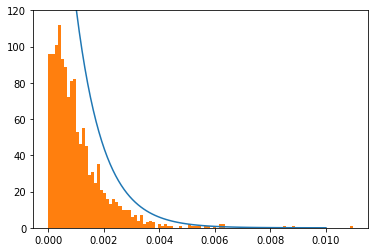

In [203]:
x=np.linspace(0,0.01,100)
plt.plot(x,stats.expon.pdf(x ,scale=0.00099,loc=-0.0011))
plt.hist(ret_pos,bins=100)
plt.ylim([0,120])
plt.show()

parameter value:  0.13650000000000045


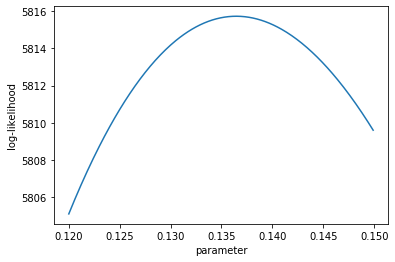

In [189]:
log_likelihood = lambda a: sum([np.log(stats.powerlaw.pdf(v, a=a)) for v in ret_pos])

a= np.arange(0.12,0.15,0.0001)
estimates = [log_likelihood(aa) for aa in a]

plt.xlabel('parameter')
plt.ylabel('log-likelihood')
plt.plot(a, estimates)
print('parameter value: ', a[estimates.index(max(estimates))])

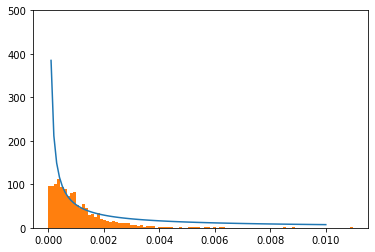

In [196]:
x=np.linspace(0,0.01,100)
plt.plot(x,stats.powerlaw.pdf(x ,a=0.1365,loc=0))
plt.hist(ret_pos,bins=100)
plt.ylim([0,500])
plt.show()

In [255]:
penalty=100
log_likelihood = lambda threshold, exp_scale, exp_loc, power_a, power_loc: \
                                                        sum([np.log(stats.expon.pdf(v, scale=exp_scale,loc=exp_loc)) for v in ret_pos[ret_pos<=threshold]])+\
                                                        sum([np.log(stats.powerlaw.pdf(v, a=power_a,loc=power_loc)) for v in ret_pos[ret_pos>threshold]])-\
                                                        penalty*(stats.expon.pdf(threshold, scale=exp_scale,loc=exp_loc)-stats.powerlaw.pdf(threshold, a=power_a,loc=power_loc))**2

exp_scale = np.arange(0.0008, 0.0012, 0.0001)
exp_loc = np.arange(-0.003, -0.001, 0.001)
power_a=np.arange(0.005,0.01,0.001)
power_loc=np.arange(0.001,0.004,0.001)
threshold=np.arange(0.002,0.005,0.001)

result_dict={}

for e_s in exp_scale:
    for e_l in exp_loc:
        for p_a in power_a:
            for p_l in power_loc:
                for t in threshold:
                    ll=log_likelihood(t,e_s, e_l, p_a,p_l)
                    title=str(f'{t}_{e_s}_{e_l}_{p_a}_{p_l}')
                    result_dict[title]=ll
result_dict

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:5680: RuntimeWarning: divide by zero encountered in power
  return a*x**(a-1.0)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:5680: RuntimeWarning: divide by zero encountered in power
  return a*x**(a-1.0)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:5680: RuntimeWarning: divide by zero encountered in power
  return a*x**(a-1.0)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/V

{'0.002_0.0008_-0.003_0.005_0.001': 2440.7199753259274,
 '0.003_0.0008_-0.003_0.005_0.001': 2619.122483397785,
 '0.004_0.0008_-0.003_0.005_0.001': 2662.6361237115343,
 '0.002_0.0008_-0.003_0.005_0.002': -inf,
 '0.003_0.0008_-0.003_0.005_0.002': 1231.314601617392,
 '0.004_0.0008_-0.003_0.005_0.002': 2375.0483433584127,
 '0.002_0.0008_-0.003_0.005_0.003': -inf,
 '0.003_0.0008_-0.003_0.005_0.003': -inf,
 '0.004_0.0008_-0.003_0.005_0.003': 732.8612691574172,
 '0.002_0.0008_-0.003_0.006_0.001': 1938.010444093334,
 '0.003_0.0008_-0.003_0.006_0.001': 2445.730695040198,
 '0.004_0.0008_-0.003_0.006_0.001': 2567.9450247667296,
 '0.002_0.0008_-0.003_0.006_0.002': -inf,
 '0.003_0.0008_-0.003_0.006_0.002': 388.9282463284171,
 '0.004_0.0008_-0.003_0.006_0.002': 2149.4399907299903,
 '0.002_0.0008_-0.003_0.006_0.003': -inf,
 '0.003_0.0008_-0.003_0.006_0.003': -inf,
 '0.004_0.0008_-0.003_0.006_0.003': -207.05343332201255,
 '0.002_0.0008_-0.003_0.007_0.001': 1269.8872355483304,
 '0.003_0.0008_-0.003_0.0

In [256]:
max(result_dict, key=result_dict.get)

'0.004_0.0011000000000000003_-0.002_0.008_0.002'

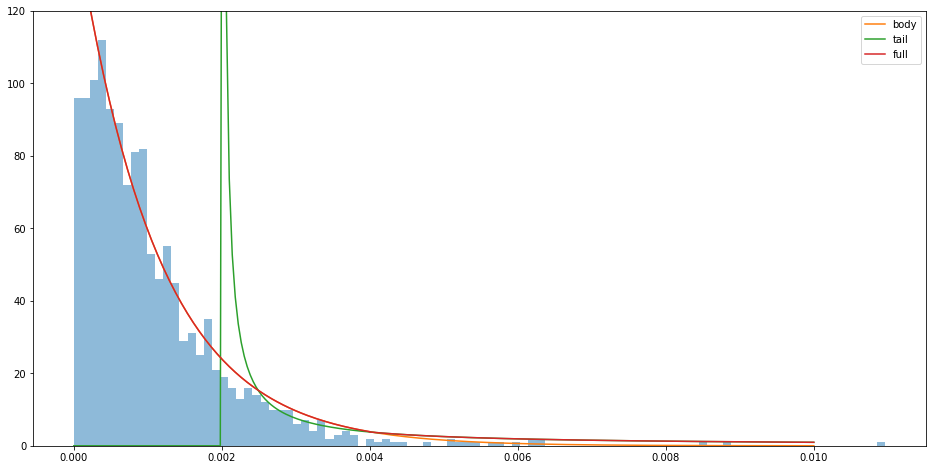

In [261]:
plt.subplots(figsize=(16,8))
x1=np.linspace(0,0.004,100)
x2=np.linspace(0.004,0.01,100)
plt.hist(ret_pos,bins=100,alpha=0.5)
plt.plot(list(x1)+list(x2),list(stats.expon.pdf(list(x1)+list(x2),scale=0.0011,loc=-0.002)),label='body',alpha=1)
plt.plot(list(x1)+list(x2),list(stats.powerlaw.pdf(list(x1)+list(x2),a=0.008,loc=0.002)),label='tail',alpha=1)
plt.plot(list(x1)+list(x2),list(stats.expon.pdf(x1,scale=0.0011,loc=-0.002))+list(stats.powerlaw.pdf(x2 ,a=0.008,loc=0.002)),label='full')
plt.ylim([0,120])
plt.legend()
plt.show()